# Βιβλιοθήκες και ανάλυση δεδομένων

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from IPython.display import display
from pylab import plt, mpl
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as splitter
import pickle
import os 
from math import sqrt

In [3]:
tree=pd.read_csv("covtype1.csv")
tree.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [26]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [27]:
tree.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


In [28]:
def reversed_dummies(df: pd.DataFrame, dummy_cols: list, new_header: str, prefix='_') ->'DataFrame':
    serial=df[dummy_cols].idxmax(axis=1).str.split(prefix).str[-1]
    return pd.concat([df.drop(dummy_cols,axis=1),pd.DataFrame(serial,columns=[new_header])],axis=1)

In [29]:
dummy_cols=['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31','Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']
df=reversed_dummies(tree,dummy_cols,'Soil')
dummy_cols=['Wilderness_Area1','Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
df=reversed_dummies(df,dummy_cols,'Wilderness')
df.head().T

,0,1,2,3,4
Elevation,2596,2590,2804,2785,2595
Aspect,51,56,139,155,45
Slope,3,2,9,18,2
Horizontal_Distance_To_Hydrology,258,212,268,242,153
Vertical_Distance_To_Hydrology,0,-6,65,118,-1
Horizontal_Distance_To_Roadways,510,390,3180,3090,391
Hillshade_9am,221,220,234,238,220
Hillshade_Noon,232,235,238,238,234
Hillshade_3pm,148,151,135,122,150
Horizontal_Distance_To_Fire_Points,6279,6225,6121,6211,6172


In [30]:
df.head(1).T

,0
Elevation,2596
Aspect,51
Slope,3
Horizontal_Distance_To_Hydrology,258
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,510
Hillshade_9am,221
Hillshade_Noon,232
Hillshade_3pm,148
Horizontal_Distance_To_Fire_Points,6279


In [31]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,7.000000


In [32]:
df.Cover_Type.unique() 

array([5, 2, 1, 7, 3, 6, 4], dtype=int64)

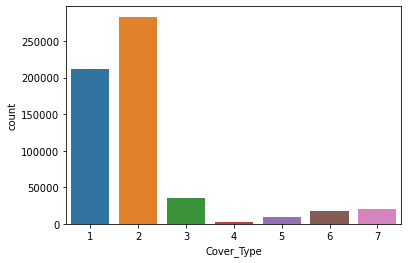

In [33]:
sns.countplot(x='Cover_Type',data=df);

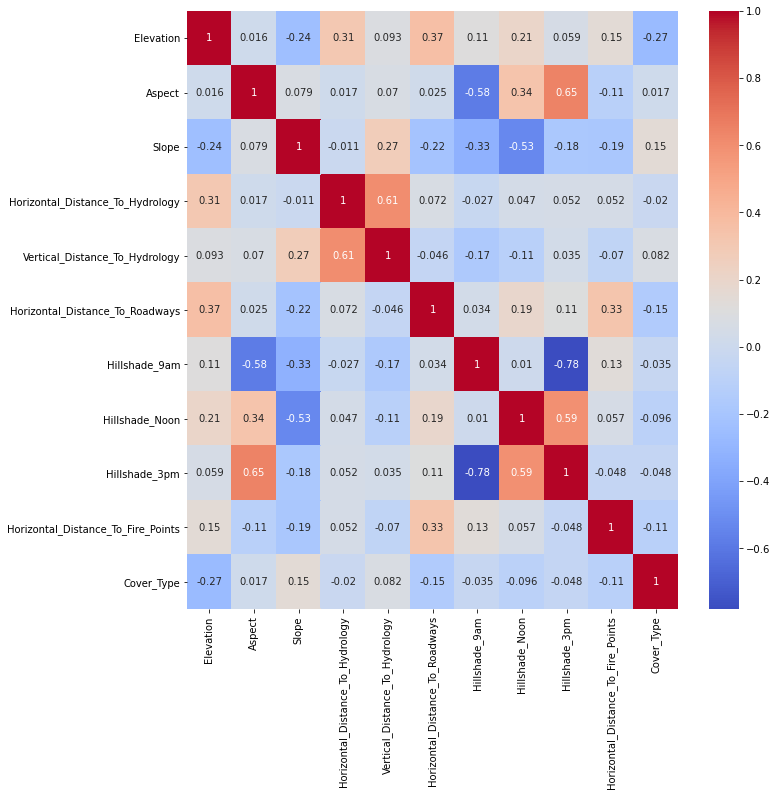

In [34]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm");

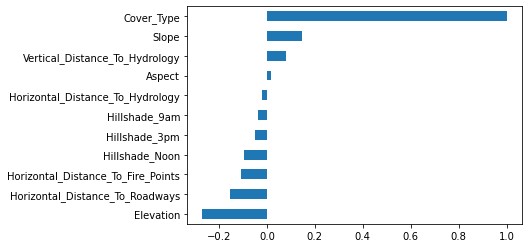

In [35]:
df.corr()["Cover_Type"].sort_values().plot.barh();

In [4]:
X =tree.iloc[:, :-1]
y = tree.iloc[:,-1]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
#Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Δοκιμή αλγορίθμων με διαφορετικές υπερπαραμέτρους

In [6]:
logreg = LogisticRegression(tol=0.01, solver='lbfgs', verbose=1, C=1.0,max_iter=100)
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression before scaling: {:.3f}".format(logreg.score(X_test,y_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test set accuracy with Logistic Regression before scaling: 0.621


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished


In [7]:
logreg = LogisticRegression(tol=0.001, solver='saga', verbose=1, C=1.0,max_iter=100)
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression before scaling: {:.3f}".format(logreg.score(X_test,y_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 393 seconds


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.6min finished


Test set accuracy with Logistic Regression before scaling: 0.689


In [9]:
logreg = LogisticRegression(tol=0.001, solver='sag', verbose=1, C=1.0,max_iter=100)
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression before scaling: {:.3f}".format(logreg.score(X_test,y_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 175 seconds
Test set accuracy with Logistic Regression before scaling: 0.690


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min finished


In [8]:
logreg = LogisticRegression(tol=0.001, solver='liblinear', verbose=1, C=1.0,max_iter=100)
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression before scaling: {:.3f}".format(logreg.score(X_test,y_test)))

[LibLinear]Test set accuracy with Logistic Regression before scaling: 0.687


In [31]:
logreg = LogisticRegression(tol=0.001, solver='lbfgs', verbose=1, C=0.1,max_iter=100)
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression before scaling: {:.3f}".format(logreg.score(X_test,y_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test set accuracy with Logistic Regression before scaling: 0.619


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   46.9s finished


In [14]:
logreg = LogisticRegression(tol=0.001, solver='lbfgs', verbose=1, C=1.0,max_iter=1000)
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression before scaling: {:.3f}".format(logreg.score(X_test,y_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.8min finished


Test set accuracy with Logistic Regression before scaling: 0.684


In [22]:
logreg = LogisticRegression(tol=0.001, solver='saga', verbose=1, C=1.0,max_iter=100,penalty='elasticnet',l1_ratio=0.5)
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression before scaling: {:.3f}".format(logreg.score(X_test,y_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 427 seconds
Test set accuracy with Logistic Regression before scaling: 0.686


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.1min finished


In [7]:
logreg = LogisticRegression(tol=0.001, solver='lbfgs', verbose=1, C=1.0,max_iter=500)
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression before scaling: {:.3f}".format(logreg.score(X_test,y_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test set accuracy with Logistic Regression before scaling: 0.667


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.1min finished


In [8]:
logreg = LogisticRegression(tol=0.001, solver='lbfgs', verbose=1, C=1.0,max_iter=400)
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression before scaling: {:.3f}".format(logreg.score(X_test,y_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test set accuracy with Logistic Regression before scaling: 0.662


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min finished


In [9]:
logreg = LogisticRegression(tol=0.001, solver='sag', verbose=1, C=1.0,max_iter=500)
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression before scaling: {:.3f}".format(logreg.score(X_test,y_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 315 epochs took 495 seconds
Test set accuracy with Logistic Regression before scaling: 0.693


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.3min finished


# Σύγκριση των μοντέλων Logistic Regression και LDA

In [23]:
logreg = LogisticRegression(tol=0.001, solver='lbfgs', verbose=1, C=1.0,max_iter=10000)
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression before scaling: {:.3f}".format(logreg.score(X_test,y_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 73.9min finished


Test set accuracy with Logistic Regression before scaling: 0.704


In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [23]:
ldareg = LDA(n_components=None, priors=None, shrinkage=None, solver='svd',store_covariance=False, tol=0.001)
ldareg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression before scaling: {:.3f}".format(ldareg.score(X_test,y_test)))

Test set accuracy with Logistic Regression before scaling: 0.679


# Αναζήτηση των κατάλληλων υπερπαραμέτρων μέσω πλέγματος

In [31]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = [    
    {'penalty' : [ 'l2'] ,
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['sag','saga','lbfgs'],
    'max_iter' : [1000]
    }
]

In [32]:
logModel= LogisticRegression()

In [33]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv=2 , verbose=1, n_jobs=-1)

In [ ]:
best_clf = clf.fit(X_train,y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


In [27]:
best_clf.best_estimator_

LogisticRegression(C=11.288378916846883, max_iter=1000, solver='sag')

In [28]:
print (f'Accuracy - : {best_clf.score(X,y):.3f}')

Accuracy - : 0.700


In [29]:
logreg = LogisticRegression(tol=0.001, solver='sag', verbose=1, C=11.29,max_iter=1000)
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression before scaling: {:.3f}".format(logreg.score(X_test,y_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 311 epochs took 193 seconds
Test set accuracy with Logistic Regression before scaling: 0.693


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min finished


# Cross Validation

In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   50.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

Cross-Validation Accuracy Scores [0.62651521 0.6206142  0.61776204 0.61709818 0.61795874 0.62036832
 0.61874554 0.62039291 0.62316204 0.61809688]


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.2s finished


In [15]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.6170981780629933, 0.6200714053229899, 0.6265152073959332)

In [16]:
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [17]:
print (y_pred_proba)

[0.25257891 0.37612869 0.36076553 ... 0.49961526 0.11001788 0.80774071]


In [28]:
y_pred_proba.reshape(1, -1)

array([[0.25257891, 0.37612869, 0.36076553, ..., 0.49961526, 0.11001788,
        0.80774071]])

# Διάστημα Εμπιστοσύνης

In [26]:
M=[1,2,3,4,5,6,7,8,9,9.5]
Acc=[]
for m in M :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    ldareg = LDA(n_components=None, priors=None, shrinkage=None, solver='svd',store_covariance=False, tol=0.001)
    ldareg.fit(X_train, y_train)
    acc=(ldareg.score(X_test,y_test))
    print('accuracy=%.3f' % acc) 
    N=0.1*m*len(X)
    interval=1.96*sqrt((acc*(1-acc))/N)
    print('interval=%.3f' %interval)
    upper= ((1-acc) +interval)*100
    lower= ((1-acc) -interval)*100
    Acc=[acc]
    print('lower=%.3f, upper=%.3f' % (lower, upper))

accuracy=0.678
interval=0.004
lower=31.791, upper=32.550
accuracy=0.683
interval=0.003
lower=31.430, upper=31.966
accuracy=0.681
interval=0.002
lower=31.671, upper=32.109
accuracy=0.681
interval=0.002
lower=31.704, upper=32.083
accuracy=0.678
interval=0.002
lower=32.031, upper=32.371
accuracy=0.680
interval=0.002
lower=31.862, upper=32.172
accuracy=0.681
interval=0.001
lower=31.783, upper=32.069
accuracy=0.678
interval=0.001
lower=32.036, upper=32.305
accuracy=0.680
interval=0.001
lower=31.859, upper=32.112
accuracy=0.676
interval=0.001
lower=32.243, upper=32.490
